# 1. Предсказание цены на недвижимость

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [2]:
import numpy as np

In [18]:
from sklearn.linear_model import LogisticRegression,LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import xgboost
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

### Данные

в sklearn есть модуль, содержащий набор классических датасетов, воспользуемся им:

In [3]:
from sklearn.datasets import load_boston

In [4]:
print(load_boston()['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
X, y = load_boston(return_X_y=True)

In [6]:
X.shape

(506, 13)

In [7]:
y.shape

(506,)

### Формирование выборок

разделим данные на 2 части, обучающую и тренировочную выборки:
1. фиксируем размер обучающей выборки
2. выделяем подмассивы данных из X, y

In [39]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [10]:
"""
make X_train, X_test, y_train, y_test
"""
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#shuffle= True - полезная штука на случай если данные исхдоные упорядочены
#stratify = 

### Построение регрессии и предсказания по тестовой выборке

In [19]:
"""
make y_pred
"""

lr = LinearRegression()

lr.fit(x_train, y_train)
y_train_predict = lr.predict(x_train)
y_test_predict = lr.predict(x_test)

In [31]:
print("\n".join([{:10}{:.3f}".format(x,y) for y,x in sorted(zip(regression.coef_, boston_data.feature_name))]))

SyntaxError: invalid syntax (<ipython-input-31-a320a476f178>, line 1)

### Оценка

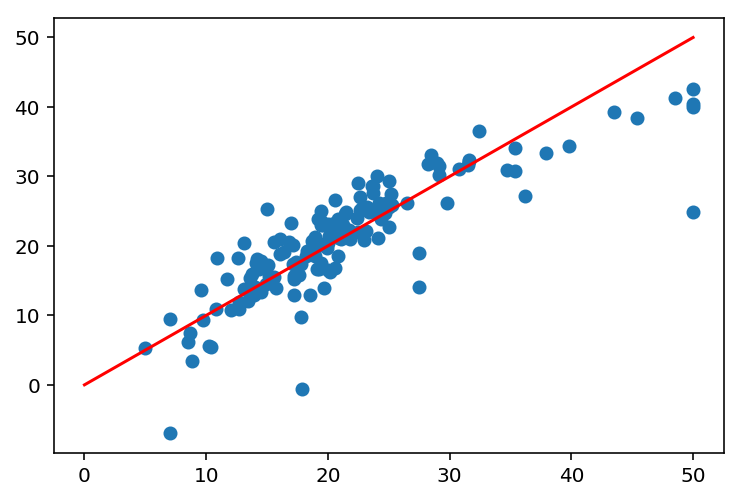

In [37]:
"""
make visual comparement 
"""

plt.scatter(x=y_test, y =y_test_predict)
plt.plot([0,50], [0,50], 'r')


### MSE

MSE - среднеквардратичная ошибка, т.е. среднее значение суммы квадратов ошибок

In [43]:
"""
count MSE
"""

rss = np.round(sum((y_test_predict-y_test) ** 2),2)
R2 = np.round(r2_score(y_test, y_test_predict),2)

mse = np.mean((y_test-y_test_predict)**2)

print('mse:' mse)
print("RSS test:", rss)
print("R^2 test:", R2)

SyntaxError: invalid syntax (<ipython-input-43-62d491d35d09>, line 10)

In [40]:
print(classification_report([int(i/10) for i in y_test], [int(i/10) for i in y_test_predict]))

             precision    recall  f1-score   support

          0       0.64      0.88      0.74         8
          1       0.86      0.67      0.75        66
          2       0.71      0.80      0.75        60
          3       0.53      0.91      0.67        11
          4       0.33      0.33      0.33         3
          5       0.00      0.00      0.00         4

avg / total       0.73      0.72      0.72       152



/Users/olgamonahova/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
